In [1]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [3]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290
...,...,...,...,...
9995,97112.86,0,12,25060.64248
9996,107424.63,1,16,21317.31764
9997,93856.99,0,4,20950.38812
9998,51250.57,1,7,16840.13376


In [4]:
dados_azar = dados.sort_values("vendido", ascending=True)
X_azar = dados_azar[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
10,75668.42,0,2,22635.36710
7,65265.09,0,10,18666.73466
3,95276.14,0,3,43167.32682
2,89627.50,0,12,11440.79806
4221,64724.65,0,10,13194.97866


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, X_azar, y_azar, cv=10)
media = results["test_score"].mean()
desvio_padrao = results["test_score"].std()
print(f"Accuracy com dummy stratified = [{media - 2*desvio_padrao}%, {media + 2*desvio_padrao}%]")

Accuracy com dummy stratified = [0.58%, 0.58%]


In [6]:
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X_azar, y_azar, cv=10)
media = results["test_score"].mean()
desvio_padrao = results["test_score"].std()
print(f"Accuracy com dummy stratified = [{media - 2*desvio_padrao}%, {media + 2*desvio_padrao}%]")

Accuracy com dummy stratified = [0.732631766053217%, 0.782968233946783%]


## Gerando dados aleatórios de modelo de carro para simular agrupamento ao usar nosso

In [7]:
dados["modelo"] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min())
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,21
1,40557.96,1,20,12622.05362,23
2,89627.50,0,12,11440.79806,11
3,95276.14,0,3,43167.32682,2
4,117384.68,1,4,12770.11290,3


In [8]:
def imprime_resultados(results):
    media = results["test_score"].mean()
    desvio_padrao = results["test_score"].std()
    print(f"Accuracy Médio {media}")
    print(f"Accuracy com dummy stratified = [{media - 2*desvio_padrao}%, {media + 2*desvio_padrao}%]")

### GroupKFOLD para anlisar o modelo com grupos

In [9]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo)
imprime_resultados(results)

Accuracy Médio 0.7577782915659717
Accuracy com dummy stratified = [0.7351623973185364%, 0.7803941858134069%]


# GroupKFold em um pipeline com StandardScaler e SVC

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([
    ("transformação", scaler), ("estimador", modelo)
])

cv = GroupKFold(n_splits=10)
results = cross_validate(pipeline, X_azar, y_azar, cv=cv, groups=dados.modelo)
imprime_resultados(results)

Accuracy Médio 0.7676156818419042
Accuracy com dummy stratified = [0.7471624833607573%, 0.7880688803230511%]


# Visualizando a árvore

In [15]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo)
imprime_resultados(results)

Accuracy Médio 0.7577782915659717
Accuracy com dummy stratified = [0.7351623973185364%, 0.7803941858134069%]


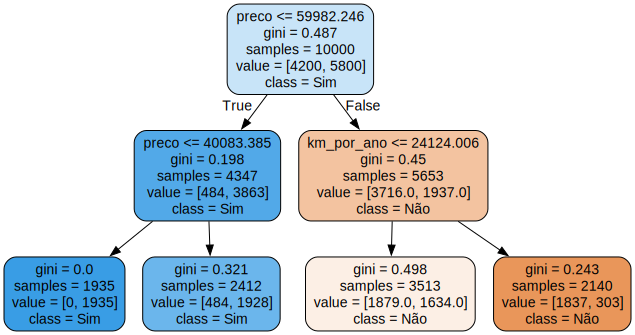

In [16]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(X_azar, y_azar)
features = X_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=["Não", "Sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph

In [17]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo)
imprime_resultados(results)

Accuracy Médio 0.7866454904034013
Accuracy com dummy stratified = [0.7731269993350651%, 0.8001639814717374%]


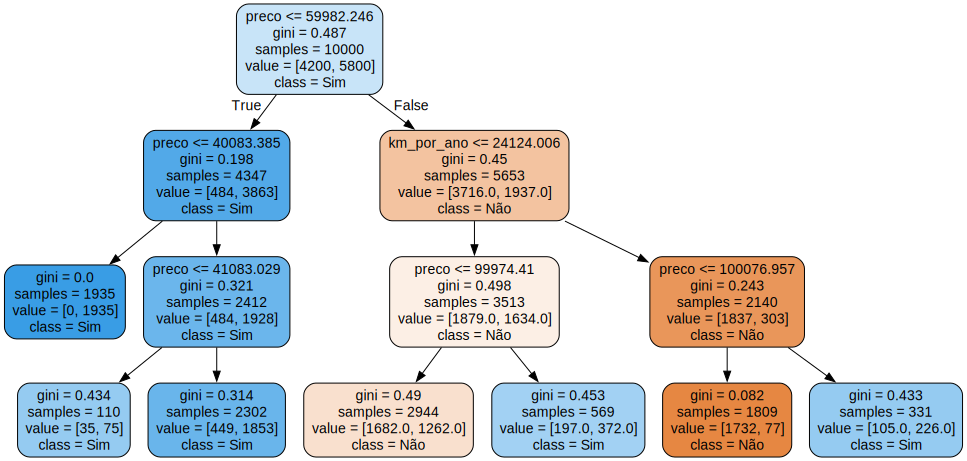

In [18]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(X_azar, y_azar)
features = X_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=["Não", "Sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph

# Testando Hiperparâmetros - 1D

In [19]:
def roda_avore_de_decisao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=True)
    # print(f"Arvore max_depth = {max_depth}, treino = {results['train_score'].mean():.2f}, teste = {results['test_score'].mean():.2f}")

    train_score = results['train_score'].mean()
    test_score = results['test_score'].mean()
    tabela = [max_depth, train_score, test_score]
    return tabela

resultados = [roda_avore_de_decisao(i) for i in range(1, 33)]
resultados = pd.DataFrame(resultados, columns=["max_depth", "train", "teste"])
resultados.head()

,max_depth,train,teste
0,1,0.757911,0.757778
1,2,0.757911,0.757778
2,3,0.787578,0.786645
3,4,0.787901,0.786447
4,5,0.789423,0.785200


### Overfitting

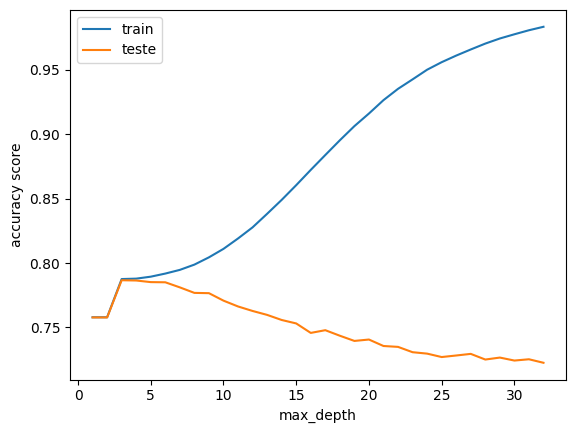

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = resultados, x="max_depth", y="train", label="train")
sns.lineplot(data = resultados, x="max_depth", y="teste", label="teste")
plt.ylabel("accuracy score")
plt.legend()

# Testando Hiperparâmetros - 2D

In [21]:
def roda_avore_de_decisao(max_depth, min_samples_leaf):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=True)
    # print(f"Arvore max_depth = {max_depth}, treino = {results['train_score'].mean():.2f}, teste = {results['test_score'].mean():.2f}")

    train_score = results['train_score'].mean()
    test_score = results['test_score'].mean()
    tabela = [max_depth, min_samples_leaf, train_score, test_score]
    return tabela

def busca():
    resultados = []
    for max_depth in range(1, 11):
        for min_samples_leaf in range(1, 11):
            tabela = roda_avore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "train", "teste"])
    return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,train,teste
0,1,1,0.757911,0.757778
1,1,2,0.757911,0.757778
2,1,3,0.757911,0.757778
3,1,4,0.757911,0.757778
4,1,5,0.757911,0.757778


In [22]:
resultados.sort_values("teste", ascending=False).head()

,max_depth,min_samples_leaf,train,teste
29,3,10,0.787523,0.786946
28,3,9,0.787523,0.786946
25,3,6,0.787523,0.786946
24,3,5,0.787523,0.786946
26,3,7,0.787523,0.786946


In [23]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,teste
max_depth,1.000000e+00,4.047940e-16,0.893206,0.164274
min_samples_leaf,4.047940e-16,1.000000e+00,-0.044111,-0.074180
train,8.932057e-01,-4.411081e-02,1.000000,0.560016
teste,1.642744e-01,-7.418005e-02,0.560016,1.000000


<Axes: >

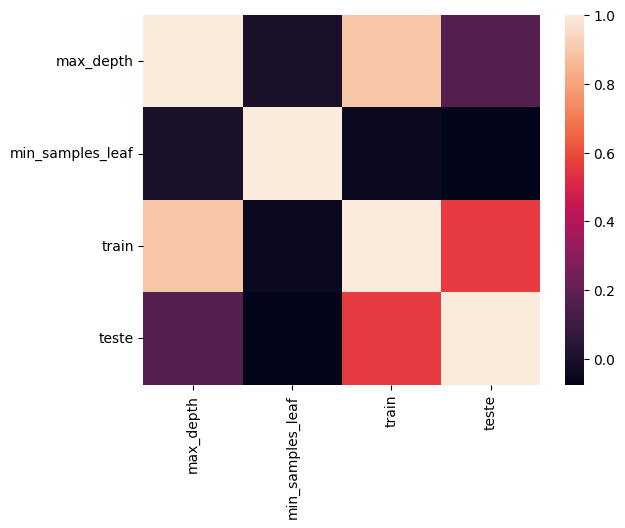

In [24]:
sns.heatmap(data=corr)

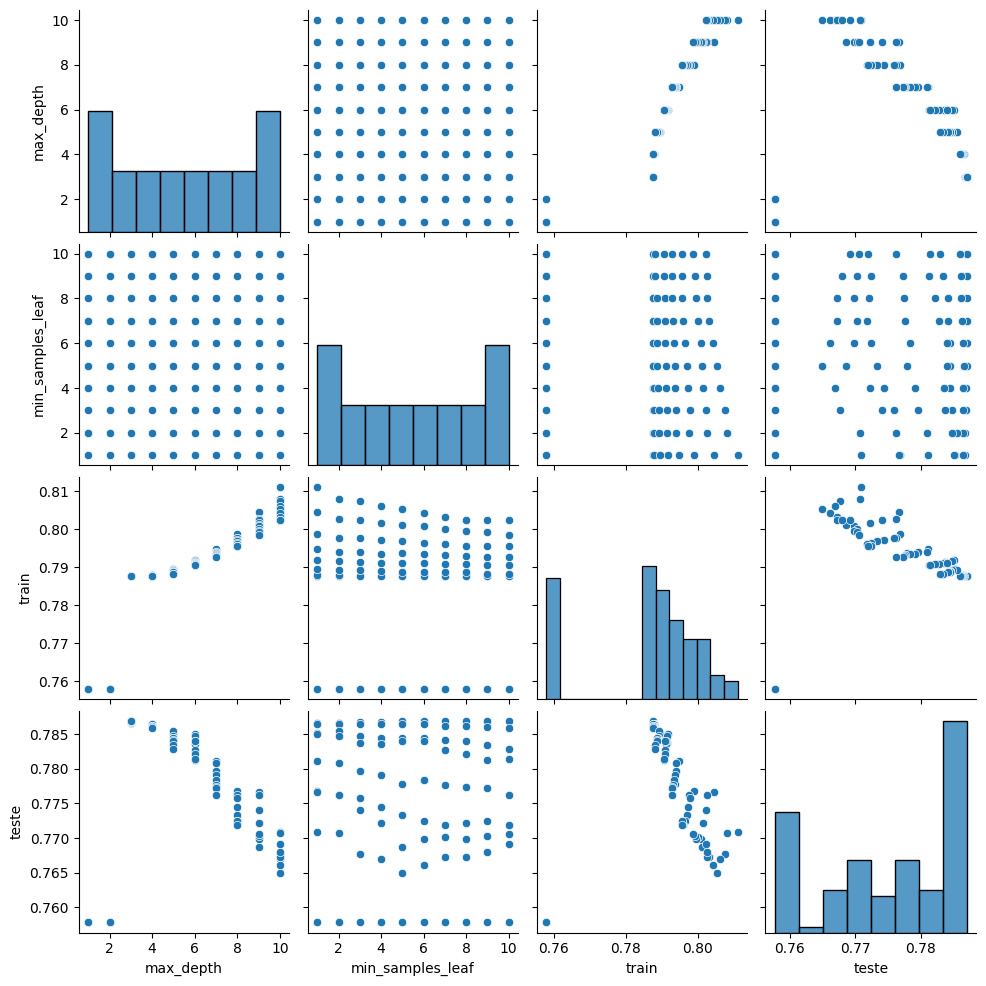

In [25]:
sns.pairplot(resultados)

<Axes: >

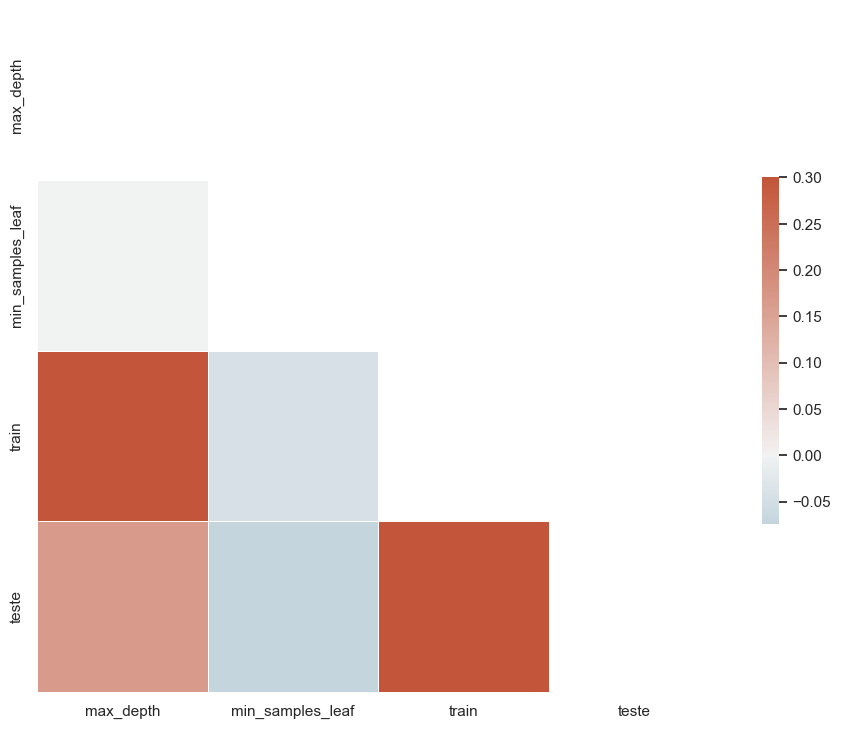

In [26]:
from string import ascii_letters

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Hyperparameter Tuning - 3D

In [27]:
def roda_avore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    results = cross_validate(modelo, X_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=True)

    fit_time = results["fit_time"].mean()
    score_time = results["score_time"].mean()

    train_score = results['train_score'].mean()
    test_score = results['test_score'].mean()
    tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
    return tabela

def busca():
    resultados = []
    for max_depth in range(1, 6):
        for min_samples_leaf in range(1, 6):
            for min_samples_split in [32, 64, 128, 526]:
                tabela = roda_avore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
                resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "min_samples_split", "train", "teste", "fit_time", "score_time"])
    return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,teste,fit_time,score_time
0,1,1,32,0.757911,0.757778,0.008577,0.002700
1,1,1,64,0.757911,0.757778,0.008641,0.002793
2,1,1,128,0.757911,0.757778,0.007659,0.002347
3,1,1,526,0.757911,0.757778,0.007297,0.002737
4,1,2,32,0.757911,0.757778,0.005709,0.001922


In [28]:
resultados.sort_values("teste", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,teste,fit_time,score_time
59,3,5,526,0.787523,0.786946,0.010792,0.002047
58,3,5,128,0.787523,0.786946,0.011206,0.001995
57,3,5,64,0.787523,0.786946,0.010766,0.002012
56,3,5,32,0.787523,0.786946,0.010374,0.002076
78,4,5,128,0.787567,0.786946,0.015730,0.001901


In [29]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,min_samples_split,train,teste,fit_time,score_time
max_depth,1.000000e+00,3.241851e-16,1.458182e-16,0.876144,0.854020,0.914847,-0.022355
min_samples_leaf,3.241851e-16,1.000000e+00,3.645454e-17,-0.003632,0.001929,-0.002517,0.094800
min_samples_split,1.458182e-16,3.645454e-17,1.000000e+00,-0.003623,0.007162,-0.047580,-0.019613
train,8.761445e-01,-3.631780e-03,-3.622729e-03,1.000000,0.998288,0.826427,-0.003373
teste,8.540204e-01,1.929454e-03,7.162296e-03,0.998288,1.000000,0.808430,-0.009974
fit_time,9.148468e-01,-2.517291e-03,-4.758029e-02,0.826427,0.808430,1.000000,0.239995
score_time,-2.235451e-02,9.480040e-02,-1.961313e-02,-0.003373,-0.009974,0.239995,1.000000


<Axes: >

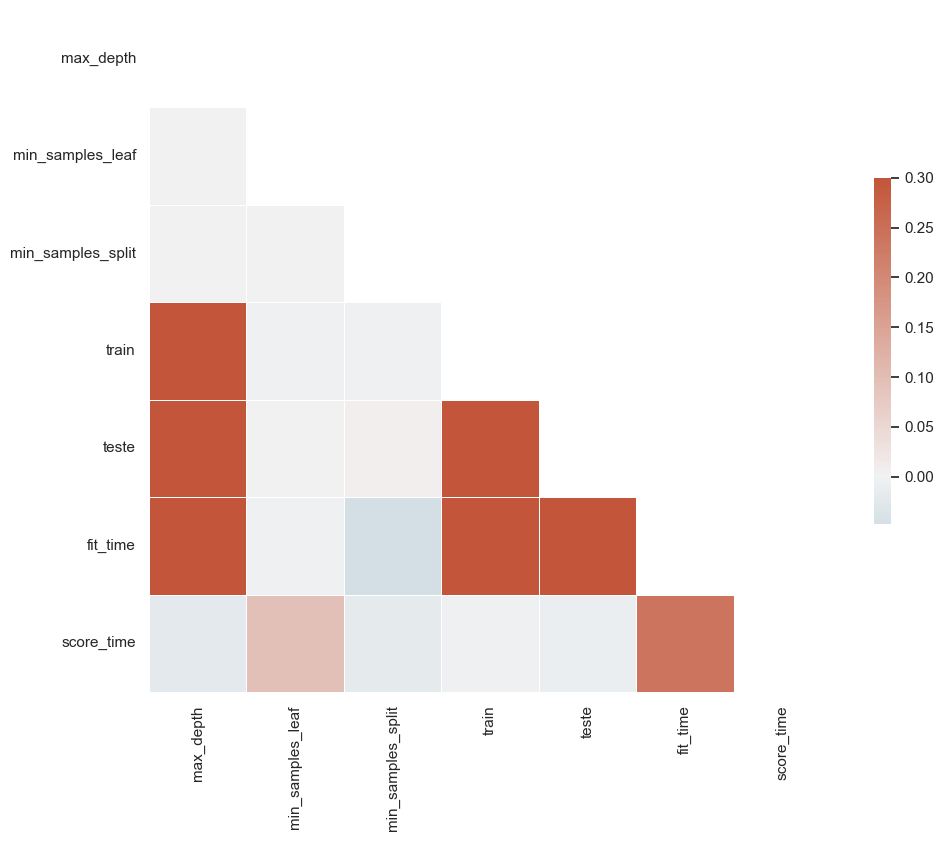

In [30]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Hiperparameter Search with GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3,5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros,
                     cv = GroupKFold(n_splits=10))
busca.fit(X_azar, y_azar, groups=dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012860,0.001004,0.003032,0.001036,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,...,0.781598,0.79403,0.782266,0.798379,0.792049,0.779247,0.783366,0.786946,0.006495,1
1,0.013105,0.002237,0.003594,0.001125,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,...,0.781598,0.79403,0.782266,0.798379,0.792049,0.779247,0.783366,0.786946,0.006495,1
2,0.015338,0.002222,0.003294,0.002022,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,...,0.781598,0.79403,0.782266,0.798379,0.792049,0.779247,0.783366,0.786946,0.006495,1
3,0.013374,0.002242,0.002692,0.000895,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,...,0.781598,0.79403,0.782266,0.798379,0.792049,0.779247,0.783366,0.786946,0.006495,1
4,0.014059,0.005946,0.009487,0.018059,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,...,0.781598,0.79403,0.782266,0.798379,0.792049,0.779247,0.783366,0.786946,0.006495,1


In [32]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.69462370400498


In [33]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

# ERRADO! Tem Data Leaking

In [34]:
from sklearn.metrics import accuracy_score

predicoes = melhor.predict(X_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print(f"Accuracy para os dados {accuracy}%")

Accuracy para os dados 78.75%


# Nested Cross Validation

Accurate way to measure the generalization error.
- Unfortunately, nested cross validation doesnt work for group division of the dataset, thus another method of k-folding is necessary

In [35]:
from sklearn.model_selection import GridSearchCV, KFold

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3,5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros,
                     cv = KFold(n_splits=10, shuffle=True))
busca.fit(X_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011537,0.002098,0.001892,0.000559,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.787,...,0.775,0.798,0.784,0.798,0.798,0.775,0.773,0.7869,0.009823,1
1,0.011189,0.001188,0.002138,0.000974,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.787,...,0.775,0.798,0.784,0.798,0.798,0.775,0.773,0.7869,0.009823,1
2,0.010627,0.000966,0.001918,0.000869,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.787,...,0.775,0.798,0.784,0.798,0.798,0.775,0.773,0.7869,0.009823,1
3,0.011635,0.001630,0.001813,0.001010,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.787,...,0.775,0.798,0.784,0.798,0.798,0.775,0.773,0.7869,0.009823,1
4,0.012061,0.001629,0.002088,0.000925,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.787,...,0.775,0.798,0.784,0.798,0.798,0.775,0.773,0.7869,0.009823,1


In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, X_azar, y_azar,
                          cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7935, 0.787 , 0.789 , 0.7825, 0.782 ])

In [37]:
def imprime_scores(scores):
    media = scores.mean() * 100
    desvio_padrao = scores.std() * 100
    print(f"Accuracy Médio {media}")
    print(f"Accuracy com dummy stratified = [{media - 2*desvio_padrao:.2f}%, {media + 2*desvio_padrao:.2f}%]")

In [38]:
imprime_scores(scores)

Accuracy Médio 78.68
Accuracy com dummy stratified = [77.83%, 79.53%]


In [39]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

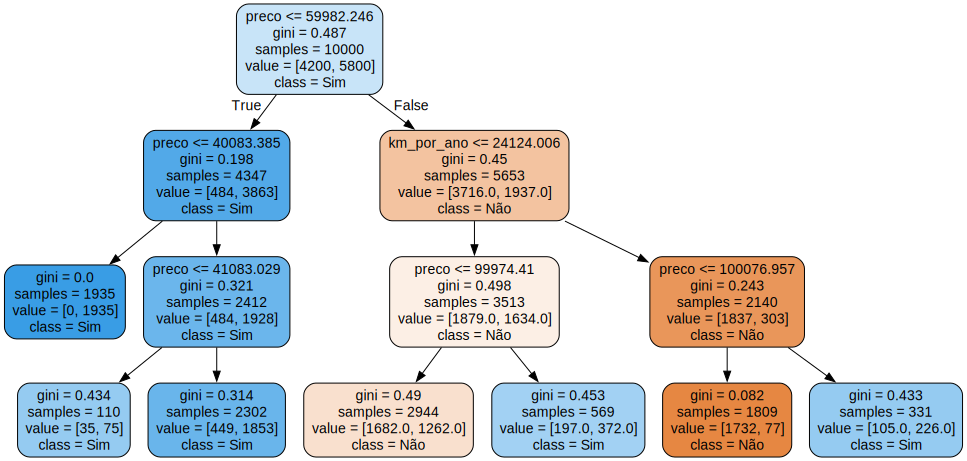

In [40]:
features = X_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                class_names=["Não", "Sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph

# Random Search ==================

In [41]:
from sklearn.model_selection import RandomizedSearchCV, KFold

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3,5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), espaco_de_parametros,
                     cv = KFold(n_splits=5, shuffle=True), random_state=SEED,
                     n_iter = 16)
busca.fit(X_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012985,0.000660,0.002178,0.000722,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.7855,0.786,0.782,0.798,0.774,0.7851,0.007749,15
1,0.010846,0.000847,0.002258,0.000523,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7855,0.786,0.791,0.798,0.774,0.7869,0.007864,1
2,0.009452,0.000482,0.001795,0.000399,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7855,0.786,0.791,0.798,0.774,0.7869,0.007864,1
3,0.016642,0.000968,0.001990,0.000005,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.7855,0.786,0.791,0.798,0.774,0.7869,0.007864,1
4,0.017753,0.001716,0.001811,0.000408,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7855,0.786,0.791,0.798,0.774,0.7869,0.007864,1


In [42]:
scores = cross_val_score(busca, X_azar, y_azar,
                          cv = KFold(n_splits=5, shuffle=True))
imprime_scores(scores)

Accuracy Médio 78.69
Accuracy com dummy stratified = [77.71%, 79.67%]


In [43]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)

# Customizando Espaço de Parâmetros

In [45]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3, 5, 10, 15, 20, 30, None],
    "min_samples_split": randint(32, 128),
    "min_samples_leaf": randint(32, 128),
    "criterion": ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), espaco_de_parametros,
                     cv = KFold(n_splits=5, shuffle=True), random_state=SEED,
                     n_iter = 16)
busca.fit(X_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

scores = cross_val_score(busca, X_azar, y_azar,
                          cv = KFold(n_splits=5, shuffle=True))
imprime_scores(scores)

melhor = busca.best_estimator_
melhor

Accuracy Médio 78.69
Accuracy com dummy stratified = [77.71%, 79.67%]


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)

### Imprimindo melhores resultados

In [48]:
resultados_ordernados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordernados_pela_media.iterrows():
    print(f"{linha.mean_test_score:.2f} +- {linha.std_test_score:.2f} {linha.params}")

0.79 +- 0.01 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.79 +- 0.01 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.79 +- 0.01 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.78 +- 0.01 {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 104, 'min_samples_split': 88}
0.78 +- 0.01 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.78 +- 0.01 {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 103, 'min_samples_split': 96}
0.78 +- 0.01 {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 100, 'min_samples_split': 84}
0.78 +- 0.01 {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 74, 'min_samples_split': 58}
0.78 +- 0.01 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 101, 'min_samples_split': 52}
0.78 +- 0.00 {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1

## Exploração Maior

In [49]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth": [3, 5, 10, 15, 20, 30, None],
    "min_samples_split": randint(32, 128),
    "min_samples_leaf": randint(32, 128),
    "criterion": ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), espaco_de_parametros,
                     cv = KFold(n_splits=5, shuffle=True), random_state=SEED,
                     n_iter = 64)
busca.fit(X_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

scores = cross_val_score(busca, X_azar, y_azar,
                          cv = KFold(n_splits=5, shuffle=True))
imprime_scores(scores)

melhor = busca.best_estimator_
melhor

Accuracy Médio 78.6
Accuracy com dummy stratified = [76.82%, 80.38%]


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)

In [50]:
resultados_ordernados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordernados_pela_media.iterrows():
    print(f"{linha.mean_test_score:.2f} +- {linha.std_test_score:.2f} {linha.params}")

0.79 +- 0.01 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.79 +- 0.01 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.79 +- 0.01 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 101, 'min_samples_split': 95}
0.79 +- 0.01 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.79 +- 0.01 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.79 +- 0.01 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 120, 'min_samples_split': 46}
0.79 +- 0.01 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 50}
0.79 +- 0.01 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 106, 'min_samples_split': 108}
0.79 +- 0.01 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.79 +- 0.01 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 

# Comparando GridSearchCV com RandomizedSearchCV

## GridSearchCv

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": [10, 100],
    "max_depth": [3, 5, 10, 15, 20, 30, None],
    "min_samples_split": randint(32, 128),
    "min_samples_leaf": randint(32, 128),
    "criterion": ["gini", "entropy"],
    "bootstrap": [False, True]
}

tic = time.time()
busca = GridSearchCV(RandomForestClassifier(), espaco_de_parametros,
                     cv = KFold(n_splits=5, shuffle=True))
busca.fit(X_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print(f"Tempo que passou {tempo_que_passou}")

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

In [ ]:
resultados_ordernados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordernados_pela_media[:5].iterrows():
    print(f"{linha.mean_test_score:.2f} +- {linha.std_test_score:.2f} {linha.params}")

In [ ]:

tic = time.time()
scores = cross_val_score(busca, X_azar, y_azar,
                          cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_que_passou = tac - tic
print(f"Tempo que passou {tempo_que_passou}")

imprime_scores(scores)


melhor = busca.best_estimator_
melhor

## RandomizedSearchCv

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": [10, 100],
    "max_depth": [3, 5, 10, 15, 20, 30, None],
    "min_samples_split": randint(32, 128),
    "min_samples_leaf": randint(32, 128),
    "criterion": ["gini", "entropy"],
    "bootstrap": [False, True]
}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), espaco_de_parametros,
                     cv = KFold(n_splits=5, shuffle=True), n_iter=20,
                     random_state=SEED)
busca.fit(X_azar, y_azar)
tac = time.time()
tempo_que_passou = tac - tic
print(f"Tempo que passou {tempo_que_passou}")

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

In [ ]:
resultados_ordernados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordernados_pela_media[:5].iterrows():
    print(f"{linha.mean_test_score:.2f} +- {linha.std_test_score:.2f} {linha.params}")

In [ ]:

tic = time.time()
scores = cross_val_score(busca, X_azar, y_azar,
                          cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_que_passou = tac - tic
print(f"Tempo que passou {tempo_que_passou}")

imprime_scores(scores)


melhor = busca.best_estimator_
melhor

# Model Selection without Cross Validation

In [17]:
# 0.6 Treino
# 0.2 Teste
# 0.2 Validação

SEED = 301
np.random.seed(SEED)

# Separando a validação
from sklearn.model_selection import train_test_split

X_treino_test, X_validacao, y_treino_test, y_validacao = train_test_split(X_azar, y_azar, test_size=0.2, shuffle=True, stratify=y_azar)

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit, RandomizedSearchCV
from scipy.stats import randint

# 20% dos 80% original é 25% (0.2/0.8 = 0.25)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25)
from sklearn.ensemble import RandomForestClassifier
import time

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": [10, 100],
    "max_depth": [3, 5, 10, 15, 20, 30, None],
    "min_samples_split": randint(32, 128),
    "min_samples_leaf": randint(32, 128),
    "criterion": ["gini", "entropy"],
    "bootstrap": [False, True]
}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), espaco_de_parametros,
                     cv = split, n_iter=20,
                     random_state=SEED)
busca.fit(X_treino_test, y_treino_test)
tac = time.time()
tempo_que_passou = tac - tic
print(f"Tempo que passou {tempo_que_passou}")

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo que passou 5.011503458023071


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.516002,0.0,0.012027,0.0,True,gini,20,50,93,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.78125,0.78125,0.0,8
1,0.040011,0.0,0.003988,0.0,True,gini,20,124,88,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.78000,0.78000,0.0,14
2,0.063973,0.0,0.000000,0.0,False,gini,None,56,126,10,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.78875,0.78875,0.0,1
3,0.904025,0.0,0.008001,0.0,False,entropy,20,52,80,100,"{'bootstrap': False, 'criterion': 'entropy', '...",0.78125,0.78125,0.0,8
4,0.467969,0.0,0.012000,0.0,True,entropy,3,120,70,100,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.78125,0.78125,0.0,8


In [19]:
resultados_ordernados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordernados_pela_media[:5].iterrows():
    print(f"{linha.mean_test_score:.2f} +- {linha.std_test_score:.2f} {linha.params}")

0.79 +- 0.00 {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 56, 'min_samples_split': 126, 'n_estimators': 10}
0.79 +- 0.00 {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 99, 'min_samples_split': 125, 'n_estimators': 10}
0.79 +- 0.00 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 104, 'min_samples_split': 88, 'n_estimators': 10}
0.79 +- 0.00 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 66, 'min_samples_split': 84, 'n_estimators': 10}
0.78 +- 0.00 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 43, 'min_samples_split': 78, 'n_estimators': 10}


In [ ]:

tic = time.time()
scores = cross_val_score(busca, X_validacao, y_validacao,
                          cv = split)
tac = time.time()
tempo_que_passou = tac - tic
print(f"Tempo que passou {tempo_que_passou}")

imprime_scores(scores)


melhor = busca.best_estimator_
melhor